The breast cancer dataset in Scikit-learn (sklearn) is a widely used and well-known dataset for binary classification tasks in machine learning. It is often referred to as the "Breast Cancer Wisconsin (Diagnostic) Dataset" because it contains diagnostic information related to breast cancer tumors. This dataset is frequently used for practicing and demonstrating various classification algorithms and machine learning techniques.

The breast cancer dataset serves as a benchmark dataset for evaluating the performance of machine learning models in binary classification tasks, particularly for cancer diagnosis.

The dataset is primarily used for binary classification tasks where the goal is to classify breast tumors as either malignant (cancerous) or benign (non-cancerous) based on various features extracted from tumor biopsies

The dataset contains a total of 30 feature variables (numeric attributes) computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features represent characteristics of the cell nuclei present in the images.

Features include mean, standard error, and "worst" (the mean of the three largest values) measurements of various cell nucleus properties such as radius, texture, smoothness, compactness, concavity, symmetry, and fractal dimension.

The breast cancer dataset is commonly used for practicing classification algorithms such as Support Vector Machines (SVM), Logistic Regression, Random Forests, and k-Nearest Neighbors, among others.

This code is used for a binary classification task to predict whether breast cancer tumors are malignant (0) or benign (1) based on various features. The SVM with a **linear kernel** is used as the classification algorithm.
then experiment with **different kernels** and further tune the model to improve accuracy.

in the end we  create a confusion matrix and displays it as a heatmap for visualizing the model's performance.

Importing Libraries and Loading Data

In [1]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()


Data Exploration

In [5]:
# Display feature names
print(f"Features: {cancer.feature_names}")









Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**create data frame**

DataFrames provide a tabular representation of the data, making it more accessible and human-readable.

DataFrames are a data structure provided by the Pandas library in Python.

DataFrames offer powerful tools for data manipulation and transformation. You can perform operations like filtering rows, selecting columns, calculating statistics, and merging data from multiple sources more efficiently with DataFrames.

Data Visualization: DataFrames can be used in conjunction with data visualization libraries like Matplotlib and Seaborn to create informative plots and graphs.

Data Preprocessing: Before feeding data into a machine learning model, preprocessing steps may be required, such as handling missing values, scaling features, or encoding categorical variables.

**example 1:**
import pandas as pd

### Create a DataFrame from a dictionary or other data source:
data = {
    'Column1': [value1, value2, value3, ...],
    'Column2': [value1, value2, value3, ...],
    .. Add more columns as needed
}

df = pd.DataFrame(data)

**example 2:**
from sklearn import datasets
import pandas as pd

### Load the breast cancer dataset from Scikit-learn:
cancer = datasets.load_breast_cancer()

### Create a DataFrame from the dataset's data and feature names:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)



In [6]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df.head()  # Display the first few rows of the DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.shape  # Display the shape of the DataFrame

(569, 30)

In [8]:
# Add a 'target' column to the DataFrame
df["target"] = cancer.target
df.head()  # Display the updated DataFrame with the 'target' column

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.describe()  # Display summary statistics of the DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
df.isna().sum()  # Check for missing values in the DataFrame

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Data Splitting and Model Training

In [3]:
# Split the data into training and testing sets
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

# Create a Support Vector Machine (SVM) model with a linear kernel
model = SVC(kernel="linear")  # You can try other kernels like 'rbf', 'sigmoid', or 'poly'

# Train the model on the training data
model.fit(X_train, y_train)


Train: (398, 30)
Test: (171, 30)


SVC(kernel='linear')

Model Evaluation and Visualization

Accuracy: 0.9649122807017544


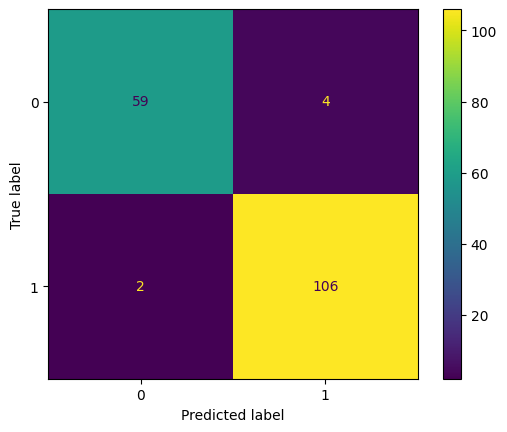

In [4]:
# Use the trained model to make predictions on the test data
y_predicted = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_predicted)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix and display it as a heatmap
cm = metrics.confusion_matrix(y_test, y_predicted, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


In [14]:
# Now, let's create an SVM model with a nonlinear RBF kernel
rbf_model = SVC(kernel="rbf")
rbf_model.fit(X_train, y_train)

# Use the RBF model to make predictions on the test data
y_predicted_rbf = rbf_model.predict(X_test)

# Calculate and print the accuracy of the RBF model
accuracy_rbf = metrics.accuracy_score(y_test, y_predicted_rbf)
print(f"Accuracy (RBF Kernel): {accuracy_rbf:.2f}")

Accuracy (RBF Kernel): 0.94
